<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Sesiones/Sesion_01b_pandas_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Construyendo Data Frame desde diccionarios  y cargando datos del un data frame


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import seaborn as sns

# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















#Solución

In [29]:
#Lectura
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')

def PascalCase(dataframe):
  newdf = dataframe.strip().title().replace("_","")
  return newdf

df = df.rename(mapper = PascalCase, axis="columns").copy()
df.head()

,Species,Island,BillLengthMm,BillDepthMm,FlipperLengthMm,BodyMassG,Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.


In [3]:
# @title #1. Características de los pinguinos por especie y especies.


# Características de los pinguinos por especie
print(f"1.1 Características de los pinguinos:\n {list(df.columns)}\n")


#Especies de pinguinos diferentes
print(f"1.2 Especies diferentes: {list(df.Species.unique())}")

1.1 Características de los pinguinos:
 ['Species', 'Island', 'BillLengthMm', 'BillDepthMm', 'FlipperLengthMm', 'BodyMassG', 'Sex']

1.2 Especies diferentes: ['Adelie', 'Chinstrap', 'Gentoo']


In [5]:
# @title #2 Valores NaN.

#Eliminar filas donde haya valores NaN
df = df.dropna(axis=0).copy()
df

,Species,Island,BillLengthMm,BillDepthMm,FlipperLengthMm,BodyMassG,Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
# @title #3. Isla con mayor número de pinguinos, buscar desbalance.


#1. Contamos las especies en las diferentes islas. (agrupar por islas y contar)
#idxmax() donde está el valor mayor en la serie.

condicion = df.groupby(["Island"]).count().Species.idxmax() #especie con el máximo
print(f"Isla con mas pinguinos es {condicion} con {df.groupby(['Island']).count().Species.max()} pinguinos")

Isla con mas pinguinos es Biscoe con 163 pinguinos


In [7]:
#Para el desbalance.
df.groupby(["Island"]).count().Species

,Species
Island,
Biscoe,163
Dream,123
Torgersen,47


Como podemos ver si hay un desbalance porque al realizar un conteo de los pinguinos por isla, vemos que hay una diferencia sustancial entre la cantidad de la isla donde hay más (163) y donde hay menos (47).

In [8]:
# @title #4. Repita la pregunta anterior observando las especies.

#Numero de especies por isla

condicion1 = df.groupby(["Species"]).count().Island.idxmax() #especie con el máximo
print(f"La especie en más islas es {condicion1} con {df.groupby(['Species']).count().Island.max()} pinguinos")

La especie en más islas es Adelie con 146 pinguinos


In [9]:
df.groupby(["Species"]).count().Island

,Island
Species,
Adelie,146
Chinstrap,68
Gentoo,119


Acá también podemos ver un desbalance, pues nuevamente la especie en más islas es la Adalie con 146 pinguinos, y la especie en menos islas es la Gentoo con 68 pinguinos.
Este desbalance habría que tenerlo en cuenta por si se quisiera realizar un análisis estadístico y tomar a los pinguinos por isla como una muestra, pues que en una isla hayan muchos individuos de una especie y en otra muy pocos, no es un dato muy preciso y podría representar un sesgo.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [10]:
# @title #5. Media y desviación estándar del tamaño del pico.


df["BillLengthMm"].describe()

,BillLengthMm
count,333.000000
mean,43.992793
std,5.468668
min,32.100000
25%,39.500000
50%,44.500000
75%,48.600000
max,59.600000


Media = 200.966967 mm

Desviación estándar = 14.015765 mm

In [11]:
# @title #6. Pinguino con el pico más largo

pico_mas_largo = df.BillLengthMm.max()
indice_pico = np.where(df['BillLengthMm'] == pico_mas_largo)
df.iloc[indice_pico]

,Species,Island,BillLengthMm,BillDepthMm,FlipperLengthMm,BodyMassG,Sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


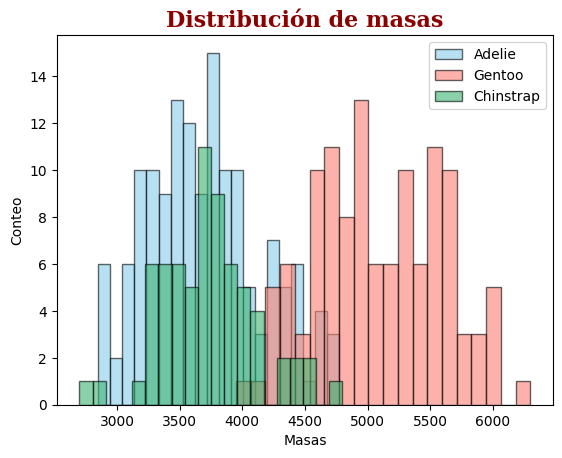

In [12]:
# @title #7. Distribución de masas



mask1 = df["Species"] == 'Adelie'
mask2 = df["Species"] == 'Gentoo'
mask3 = df["Species"] == 'Chinstrap'

df_adelie = df[mask1]
df_Gentoo = df[mask2]
df_Chinstrap = df[mask3]


plt.hist(df_adelie["BodyMassG"], bins = 20, color='skyblue', edgecolor='black', alpha = 0.6,label='Adelie')
plt.hist(df_Gentoo["BodyMassG"], bins = 20, color='salmon', edgecolor='black',alpha = 0.6, label='Gentoo')
plt.hist(df_Chinstrap["BodyMassG"], bins = 20, color='mediumseagreen', edgecolor='black',alpha = 0.6, label='Chinstrap')
plt.ylabel('Conteo')
plt.xlabel('Masas')
plt.title('Distribución de masas', color='darkred',fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
plt.legend()
plt.show()

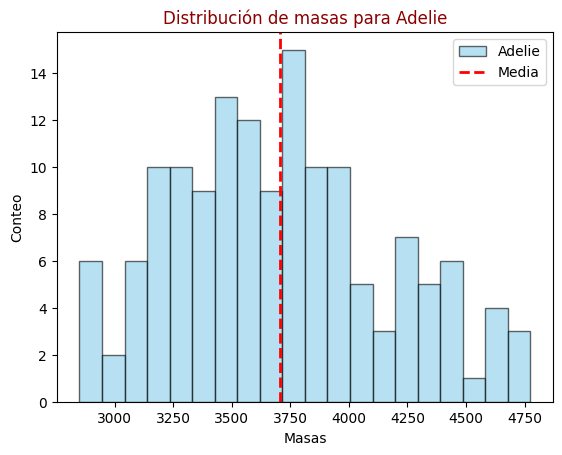

,BodyMassG
count,146.000000
mean,3706.164384
std,458.620135
min,2850.000000
25%,3362.500000
50%,3700.000000
75%,4000.000000
max,4775.000000


In [13]:
# @title #8. Describa la distribucion con ayuda de la media, desviación estándar


#Para Adelie
plt.hist(df_adelie["BodyMassG"], bins = 20, color='skyblue', edgecolor='black', alpha = 0.6,label='Adelie')
plt.ylabel('Conteo')
plt.xlabel('Masas')
plt.axvline(x=df_adelie["BodyMassG"].mean(), color='red', linestyle='--', linewidth=2, label='Media')
plt.title('Distribución de masas para Adelie', color='darkred')
plt.legend()
plt.show()
df_adelie["BodyMassG"].describe()

La distribución de las masas corporales para los pingüinos de especie Adelie tiene una media de aproximadamente 3706 gramos y una desviación estándar de 459 gramos, como vemos los datos estan poco dispersos alrededor de la media, no es del todo simétrica y está un poco recostada hacia la izquierda.


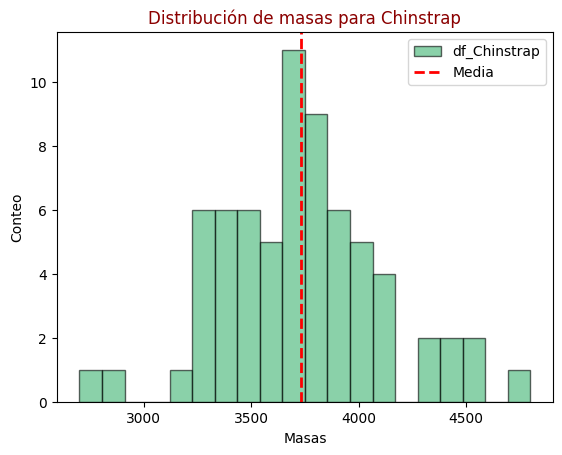

,BodyMassG
count,68.000000
mean,3733.088235
std,384.335081
min,2700.000000
25%,3487.500000
50%,3700.000000
75%,3950.000000
max,4800.000000


In [14]:
#Para Chinstrap
plt.hist(df_Chinstrap["BodyMassG"], bins = 20, color='mediumseagreen', edgecolor='black', alpha = 0.6,label='df_Chinstrap')
plt.ylabel('Conteo')
plt.xlabel('Masas')
plt.axvline(x=df_Chinstrap["BodyMassG"].mean(), color='red', linestyle='--', linewidth=2, label='Media')
plt.title('Distribución de masas para Chinstrap', color='darkred')
plt.legend()
plt.show()
df_Chinstrap["BodyMassG"].describe()

La distribución de las masas corporales para los pingüinos de especie Chinstrap tiene una media de aproximadamente 3733 gramos y una desviación estándar de 384 gramos, como vemos los datos estan poco dispersos alrededor de la media y es un poco más simétrica que la anterior.

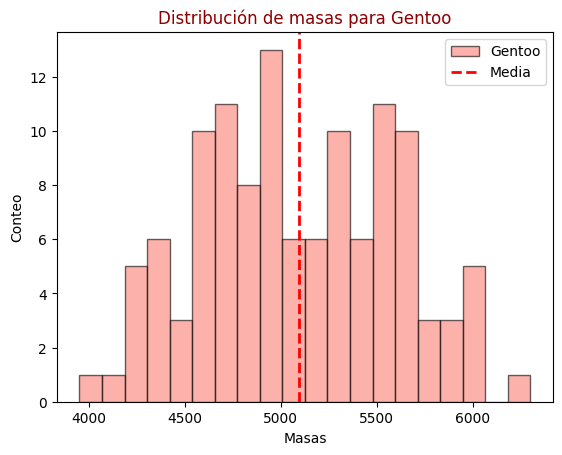

,BodyMassG
count,119.000000
mean,5092.436975
std,501.476154
min,3950.000000
25%,4700.000000
50%,5050.000000
75%,5500.000000
max,6300.000000


In [15]:
#Para Gentoo
plt.hist(df_Gentoo["BodyMassG"], bins = 20, color='salmon', edgecolor='black', alpha = 0.6,label='Gentoo')
plt.ylabel('Conteo')
plt.xlabel('Masas')
plt.axvline(x=df_Gentoo["BodyMassG"].mean(), color='red', linestyle='--', linewidth=2, label='Media')
plt.title('Distribución de masas para Gentoo', color='darkred')
plt.legend()
plt.show()
df_Gentoo["BodyMassG"].describe()

La distribución de las masas corporales para los pingüinos de especie Gentoo tiene una media de aproximadamente 6092 gramos y una desviación estándar de 501 gramos, como vemos los datos estan poco dispersos alrededor de la media.

Como vemos, la distribución de la masa de los pinguinos Gentoo nos indica que tienen usualmente más masa que los de las otras dos especies, sin embargo, tienen también una desviación más grande.

In [16]:
# @title #9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?


femenino = df["Sex"] == 'Female'
masculino = df["Sex"] == 'Male'

df_fem = df[femenino]
df_masc = df[masculino]

print(f"Masa corporal promedio de las hembras {df_fem['BodyMassG'].mean()} g con una desviación de {df_fem['BodyMassG'].std()} g")
print(f"Masa corporal promedio de los machos {df_masc['BodyMassG'].mean()} g con una desviación de {df_masc['BodyMassG'].std()} g")

Masa corporal promedio de las hembras 3862.2727272727275 g con una desviación de 666.1720495161447 g
Masa corporal promedio de los machos 4545.684523809524 g con una desviación de 787.6288841581745 g


Como vemos la masa promedio de las hembras es menor que la de los machos por aproximadamente 1000 gramos, sin embargo la desviación estándar de estos datos es menor también que en los machos.

In [17]:
# @title #10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

print(f"Longitud de la aleta de los pinguinos en la especie Adelie es {df_adelie['FlipperLengthMm'].mean()} mm con una desviación de {df_adelie['FlipperLengthMm'].std()} mm")
print(f"Longitud de la aleta de los pinguinos en la especie Gentoo es {df_Gentoo['FlipperLengthMm'].mean()} mm con una desviación de {df_Gentoo['FlipperLengthMm'].std()} mm")
print(f"Longitud de la aleta de los pinguinos en la especie Chinstrap es {df_Chinstrap['FlipperLengthMm'].mean()} mm con una desviación de {df_Chinstrap['FlipperLengthMm'].std()} mm")

Longitud de la aleta de los pinguinos en la especie Adelie es 190.1027397260274 mm con una desviación de 6.521824847286748 mm
Longitud de la aleta de los pinguinos en la especie Gentoo es 217.23529411764707 mm con una desviación de 6.5854306093881805 mm
Longitud de la aleta de los pinguinos en la especie Chinstrap es 195.8235294117647 mm con una desviación de 7.131894258578146 mm


Nuevamente vemos que las aletas de los pinguinos de la especie Gentoo son más grandes que las de los demás.

In [18]:
# @title #11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?


print(f"Longitud mínima y máxima respectiva de las aletas de los pinguinos de la especie Adelie es {df_adelie['FlipperLengthMm'].min()} y {df_adelie['FlipperLengthMm'].max()}")
print(f"Longitud mínima y máxima respectiva de las aletas de los pinguinos de la especie Gentoo es {df_Gentoo['FlipperLengthMm'].min()} y {df_Gentoo['FlipperLengthMm'].max()}")
print(f"Longitud mínima y máxima respectiva de las aletas de los pinguinos de la especie Chinstrap es {df_Chinstrap['FlipperLengthMm'].min()} y {df_Chinstrap['FlipperLengthMm'].max()}")

Longitud mínima y máxima respectiva de las aletas de los pinguinos de la especie Adelie es 172.0 y 210.0
Longitud mínima y máxima respectiva de las aletas de los pinguinos de la especie Gentoo es 203.0 y 231.0
Longitud mínima y máxima respectiva de las aletas de los pinguinos de la especie Chinstrap es 178.0 y 212.0


Como en la pregunta anterior, los pinguinos de la especie Gentoo tienen aletas más grandes que los de las demás especies.

In [19]:
# @title #12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?


picos_pinguinos = df.groupby(["Island", "Species"]).BillLengthMm.describe()
picos_pinguinos

count       mean       std   min     25%    50%     75%  \
Island    Species                                                              
Biscoe    Adelie      44.0  38.975000  2.480916  34.5  37.675  38.70  40.700   
          Gentoo     119.0  47.568067  3.106116  40.9  45.350  47.40  49.600   
Dream     Adelie      55.0  38.520000  2.484276  32.1  36.700  38.80  40.450   
          Chinstrap   68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Torgersen Adelie      47.0  39.038298  3.028097  33.5  36.650  39.00  41.100   

                      max  
Island    Species          
Biscoe    Adelie     45.6  
          Gentoo     59.6  
Dream     Adelie     44.1  
          Chinstrap  58.0  
Torgersen Adelie     46.0

- Podemos ver que en las 3 islas hay pinguinos de especie Adelie con picos de longitudes promedio entre los 38 y 39 mm y desviaciones estándar entre 2 y 3 mm.
- En la isla Dream adicional a la especie Adelie, encontramos pinguinos de la especie Chinstrap con picos de longitud promedio de 48.83 mm con una desviación de 3.33 mm.
- En la isla Biscoe, además de la especie Adelie, tambien encontramos pinguinos de la especie Gentoo con un pico promedio de 47.56 mm con una desviación de 3.1 mm.

### 13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

Como vemos en la visualización anterior la mayor variación en la longitud del pico en la especie Adelie es de 3.02 mm para la población de esta especie en la isla Torgersen. En esta isla solo encontramos pinguinos de esa especie.

En la isla Dream se encuentran las especies Adelie y Chinstrap, esta última solo se encuentra en esta isla y la longitud de sus picos cuenta con una desviación de 3.33 mm, lo cual la haría la isla con la mayor desviación estándar de la especie Chinstrap, pues solo existen en dicha isla.

Un caso similar lo tenemos para los pinguinos de la especie Gentoo, que solo se encuentran en la isla Biscoe, con una variación en sus picos de 3.10 mm, superior a la variación que hay en la longitud de los picos de la especie Adelie que también se encuentra en esta isla.


# Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

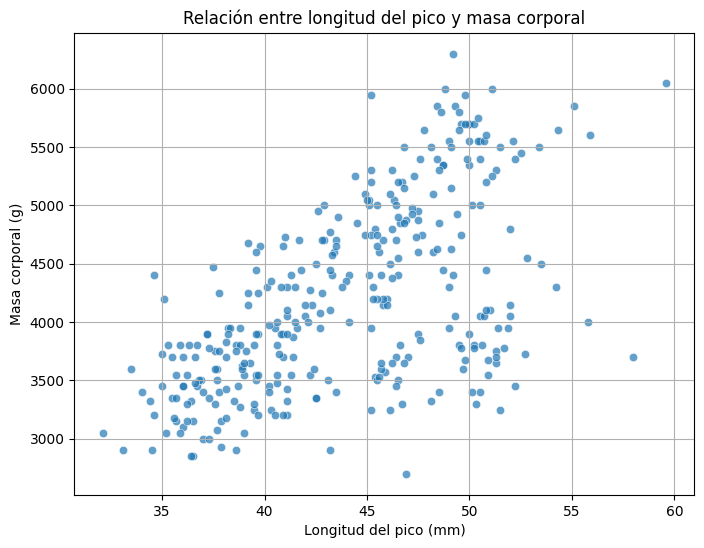

In [21]:
# @title #14 Relación entre la longitud del pico y la masa corporal de los pingüinos

# Cambiar esa relación si se mira por especie - Utilice diagramas de dispersión para visualizarlos.


# 14.1 Relación entre la longitud del pico y la masa corporal de los pinguinos.

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='BillLengthMm', y='BodyMassG', alpha=0.7)
plt.title('Relación entre longitud del pico y masa corporal')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.grid()
plt.show()

Aunque tiene un poco de dispersión, del gráfico podemos inferir que a mayor longitud del pico, mayor es la masa corporal.

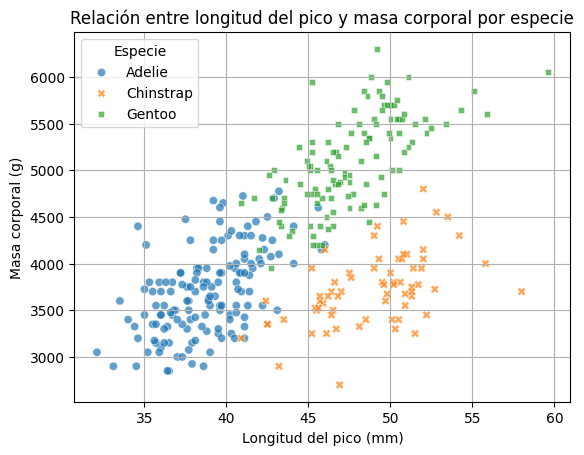

In [22]:
# @title #14.2 Análisis por especie

sns.scatterplot(data=df, x='BillLengthMm', y='BodyMassG', hue='Species', style='Species', alpha=0.7)
#hue me dice: muestreme cada especie de un color y forma diferente
plt.title('Relación entre longitud del pico y masa corporal por especie')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend(title='Especie')
plt.grid()
plt.show()

Algunas relaciones que podemos notar del gráfico:

- Los pinguinos de la especie Adelie presentan los picos más cortos y también las masas más bajas.
- Los pinguinos de la especie Chinstrap tienen picos más largos que los Adelie, pero una masa corporal intermedia o baja, si se quiere, adicionalmente podemos ver una mayor variabilidad en la longitud del pico que no parece estar tan relacionada al cambio de la masa.
- Los pinguinos de la especie Gentoo muestran los valores más altos tanto en longitud del pico como en masa corporal y es más claro observar que a mayor pico, mayor masa.


In [23]:
# @title #15. Hay una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos.


#Hallemos el coeficiente de correlación.

coef_adelie = np.corrcoef(df_adelie['BillLengthMm'], df_adelie['BodyMassG'])
coef_adelie

array([[1.        , 0.54427641],
       [0.54427641, 1.        ]])

Las entradas [0,1] y [1,0] hacen parte de las correlaciones entre las dos variables.
- Para la especie Adelie vemos una correlación positiva aproximadamente de 0.5, lo que implica que efectivamente a mayor pico, mayor masa corporal.

In [24]:
coef_Gentoo = np.corrcoef(df_Gentoo['BillLengthMm'], df_Gentoo['BodyMassG'])
coef_Gentoo

array([[1.        , 0.66673022],
       [0.66673022, 1.        ]])

Para la especie Gentoo vemos una correlación positiva un poco mayor que la anterior, con un valor aproximado de 0.7, lo que implica que efectivamente se sigue cumpliendo que a mayor pico, mayor masa corporal. Esta información concuerda con los resultados que vemos de la gráfica.

In [25]:
coef_Chinstrap = np.corrcoef(df_Chinstrap['BillLengthMm'], df_Chinstrap['BodyMassG'])
coef_Chinstrap

array([[1.        , 0.51363835],
       [0.51363835, 1.        ]])

Para la especie Chinstrap vemos nuevamente una correlación positiva un poco menor que las anteriores, lo que indica que se cumple la relación pico-masa de una manera un poco más moderada que las anteriores. Los resultados también concuerdan con lo que vemos en el diagrama de dispersión.

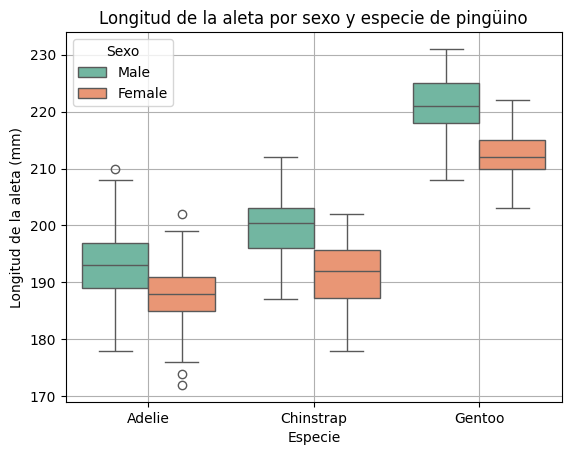

In [26]:
# @title #16. Relación entre el sexo y la longitud de la aleta en los pingüinos por especie


sns.boxplot(data=df, x='Species', y='FlipperLengthMm', hue='Sex', palette='Set2')
plt.title('Longitud de la aleta por sexo y especie de pingüino')
plt.xlabel('Especie')
plt.ylabel('Longitud de la aleta (mm)')
plt.legend(title='Sexo')
plt.grid()
plt.show()

En general, podemos notar que los pinguinos machos en las 3 especies suelen tener aletas más grandes que las pinguinos hembras. En la especie Gentoo la diferencia es mucho más marcada que en las otras dos. Esto sugiere que hay dimorfismo sexual.




In [27]:
df.groupby(['Species', 'Sex'])['FlipperLengthMm'].agg(['mean', 'std', 'count'])

mean       std  count
Species   Sex                                
Adelie    Female  187.794521  5.595035     73
          Male    192.410959  6.599317     73
Chinstrap Female  191.735294  5.754096     34
          Male    199.911765  5.976558     34
Gentoo    Female  212.706897  3.897856     58
          Male    221.540984  5.673252     61

Como vemos en la tabla, al comparar las medias de la longitud de las aletas por sexo, vemos nuevamente lo que inferimos del gráfico, que en los machos la longitud de la aleta mide más que en las hembras.

# Test de hipótesis

##17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

### La tendencia escogida es la vista en el numeral 15. Relación entre la masa corporal y el pico por especie.

Hipótesis nula: $H_0$: $\rho = 0$, es decir no hay correlación real (la observada es por azar).

Hipótesis alternativa $H_a$: $\rho ≠ 0$, es decir, sí hay una correlación real.

Realizaremos el análisis para la especie Gentoo.

Como se menciona en el ejemplo 12.8, hallaremos los valores de n (longitud de los datos), r (coeficiente de correlación )y $r^2$ (coeficiente de determinación), para obtener el valor del estadístico t (de la ecuación a continuación) con el cual hallar el P-value.
Finalmente, proponiendo un niverl de significancia de $\alpha = 0.05$ comparamos: si el P-value < $\alpha$, se rechaza la hipótesis nula, si P-value > $\alpha$ se acepta dicha hipótesis.

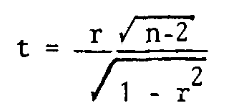

In [28]:
#PROCESO MANUAL PARA LAS ESPECIES GENTOO.

from scipy.stats import t

#Variables n, r, r^2:
n = len(df_Gentoo['BillLengthMm'])
r = coef_Gentoo[1,0]
r2 = r**2
print(f" n = {n}, r = {r}, r2 = {r2}")

#Valor del estadístico
t_estadistico = (r * np.sqrt(n - 2)) / np.sqrt(1 - r2)

#Nivel de significancia
alpha = 0.05

#Grados de libertad
df = n-2

#Prueba de hipótesis

# Como es una prueba bilateral (≠), se multiplica por 2.
p_value = 2 * (1 - t.cdf(t_estadistico, df))
print(f" El P-value es {p_value}")

 n = 119, r = 0.6667302222195619, r2 = 0.4445291892209464
 El P-value es 0.0


Como vemos P < $\alpha$, por tanto, se rechaza la hipótesis nula de manera que podemos afirmar que sí existe una correlación real entre la longitud de los picos con la masa corporal para las especies Gentoo.